# Principal Component Analysis

![](banner_pca.jpg)

_<p style="text-align: center;"> Which features are the most distinguishing? </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("point", list(size=2, colour=PALETTE[1]))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

Variable selection, dimensionality reduction ...

"Big data to tiny data."

* Useful when too many variables obscure insights from just a few variables.
* Useful when your methods work only on data represented by a small number of variables.
* Useful when your methods work better on data without too many "noisy" variables.

## Synopsis

**Terms**

## Exposition

### Principal Component Transformation and 2 Variables

#### Data

Consider this pedagogical data.  Note distributions of x and y variables.

In [2]:
data = data.frame(x=c(1, 2, 3, 6, 11, 14, 15, 16, 18), y=5*c(2.7, 2.3, 2.4, 2.8, 2.7, 3.2, 3.3, 3.25, 3.4)-5)
data

x,y
1,8.50
2,6.50
3,7.00
6,9.00
11,8.50
14,11.00
15,11.50
16,11.25
18,12.00


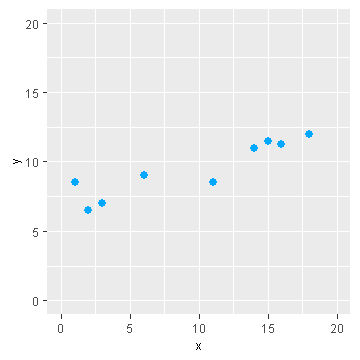

In [3]:
output_size(3,3)
ggplot(data) + xlim(0,20) + ylim(0,20) + geom_point(aes(x=x, y=y))
output_size(restore)

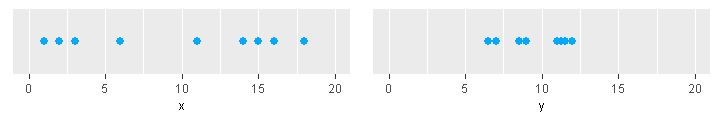

In [4]:
output_size(6,1)
p1 = ggplot(data) + xlim(0,20) + ylim(-1,1) + geom_point(aes(x=x), y=0) + theme.x_axis_only
p2 = ggplot(data) + xlim(0,20) + ylim(-1,1) + geom_point(aes(x=y), y=0) + theme.x_axis_only
grid.arrange(p1, p2, nrow=1)
output_size(restore)

#### Variation

There is more variation in x distribution than in y distribution.

In [5]:
data.frame(variance_x=var(data$x), variance_y=var(data$y))

variance_x,variance_y
43.77778,4.131944


#### Relative Variation

The plot of relative variation is called a **scree plot**.  The x variable accounts for 91% of the variation in the data, the y variable accounts for 9% of the variation in the data. 

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
x,6.616478,43.777778,43.77778,0.91375562,0.9137556
y,2.032718,4.131944,47.90972,0.08624438,1.0000000


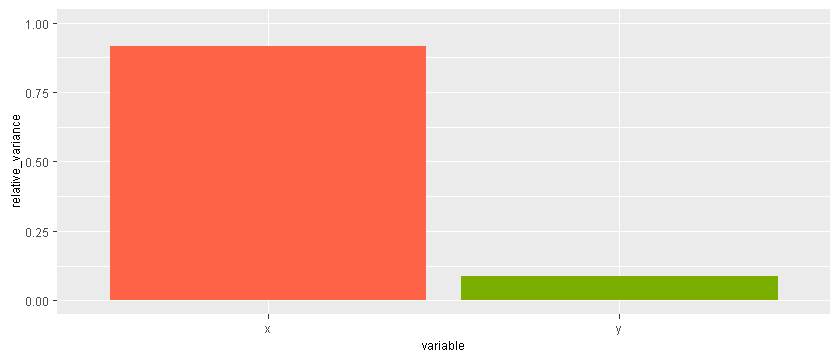

In [6]:
variable = c("x", "y")
sdev = c(sd(data$x), sd(data$y))
variance = c(var(data$x), var(data$y))
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree

ggplot(scree) + geom_col(aes(x=variable, y=relative_variance, fill=variable)) + ylim(0,1) +
scale_fill_manual(values=PALETTE[2:6]) + theme.no_legend

#### Principal Components

There a way to view the data to see even more separation in the relative variation.

* **Think of principal components as variables:**  An alternative set of variables that still capture exactly as much information and variation as the original variables do.  Each principal component's values are weighted sums of the original variables' values.
  

* **Think of principal components as axes:**  An alternative set of orthogonal axes in the same space as the original axes, each going through the centroid of the data.  The values along the first principal component have the maximum variation possible as compared to any other orthogonal axis, the values along the second principal component have the next most variation, etc. 

Find the centroid and line through the maximum variation.

In [7]:
pc = prcomp(data, scale=FALSE, retx=TRUE)

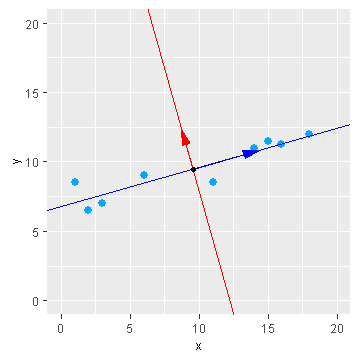

In [8]:
eigen.x.pc1 = pc$rotation["x","PC1"]
eigen.y.pc1 = pc$rotation["y","PC1"] 
eigen.x.pc2 = pc$rotation["x","PC2"]
eigen.y.pc2 = pc$rotation["y","PC2"] 
x1 = pc$center["x"]
y1 = pc$center["y"]
m.pc1 = eigen.y.pc1/eigen.x.pc1
m.pc2 = -1/m.pc1
i.pc1 = -m.pc1*x1 + y1
i.pc2 = -m.pc2*x1 + y1

output_size(3,3)
ggplot(data) + xlim(0,20) + ylim(0,20) +
geom_point(aes(x=x, y=y)) +
geom_abline(aes(slope=m.pc1, intercept=i.pc1), color="blue") +
geom_abline(aes(slope=m.pc2, intercept=i.pc2), color="red") +
geom_segment(aes(x=x1, y=y1, xend=x1+5*eigen.x.pc1, yend=y1+5*eigen.y.pc1), arrow=standard_arrow, color="blue") +
geom_segment(aes(x=x1, y=y1, xend=x1+3*eigen.x.pc2, yend=y1+3*eigen.y.pc2), arrow=standard_arrow, color="red") +
geom_point(aes(x=x1, y=y1), size=1, color="black")
output_size(restore)

Shift the centroid of the data to the origin (0,0).  Rotate the data so that the principal components align with original axes.  The transformed values are called **scores**.

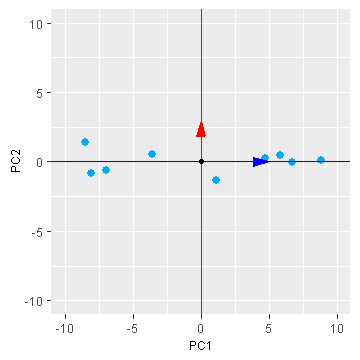

In [9]:
output_size(3,3)
ggplot(as.data.frame(pc$x)) + xlim(-10,10) + ylim(-10,10) +
geom_point(aes(x=PC1, y=PC2)) +
geom_hline(aes(yintercept=0), color="blue") +
geom_vline(aes(xintercept=0), color="red") +
geom_segment(aes(x=0, y=0, xend=5*1, yend=0), arrow=standard_arrow, color="blue") +
geom_segment(aes(x=0, y=0, xend=0, yend=3*1), arrow=standard_arrow, color="red") +
geom_point(aes(x=0, y=0), size=1, color="black")
output_size(restore)

#### How to Calculate Principal Component Scores

Step 1:  Use a function like `mean` to calculate the centroid of the data. 

In [10]:
as.data.frame(pc$center)

,pc$center
x,9.555556
y,9.472222


Step 2: Use a function like `prcomp` to calculate the weight table.

In [11]:
pc$rotation

,PC1,PC2
x,0.9620138,-0.2730009
y,0.2730009,0.9620138


Step 3:  For each observation, use this formula to calculate a score based on centroid and weight table ...

<table align="left" width="550">
  <tr>
    <td width="10">  $x \\ y$ </td>
    <td width="10">  $\large \rightarrow$ </td>
    <td width="300"> $PC1 = \left ( weight_{x,PC1} \times (x - centroid_x) \right ) + \left ( weight_{y,PC1} \times (y - centroid_y) \right ) \\
                      PC2 = \left ( weight_{x,PC2} \times (x - centroid_x) \right ) + \left ( weight_{y,PC2} \times (y - centroid_y) \right )$ </td>
  </tr>
</table>

For example ...

<table align="left" width="700">
  <tr>
    <td width="50">  $x=1 \\y=8.5$ </td>
    <td width="10">  $\large \rightarrow$ </td>
    <td width="250"> $PC1 = \big ( 0.9620138 \times (1 - 9.555556) \big ) +  \big ( 0.2730009 \times (8.5 - 9.472222) \big ) = -8.49598 \\
                      PC2 = \big ( -0.2730009 \times (1 - 9.555556) \big ) +  \big ( 0.9620138 \times (8.5  - 9.472222) \big ) = 1.400383$  </td>
  </tr>
</table>

In [12]:
PC1.point_1 = pc$rotation["x","PC1"]*(data$x[1]-pc$center["x"]) + pc$rotation["y", "PC1"]*(data$y[1]-pc$center["y"]) 
PC2.point_1 = pc$rotation["x","PC2"]*(data$x[1]-pc$center["x"]) + pc$rotation["y", "PC2"]*(data$y[1]-pc$center["y"]) 
data.frame(PC1=PC1.point_1, PC2=PC2.point_1, row.names=NULL)

PC1,PC2
-8.49598,1.400383


#### Transformed Dataset

In [13]:
data.pc = as.data.frame(pc$x)
data.pc

PC1,PC2
-8.495980,1.40038297
-8.079968,-0.79664548
-6.981454,-0.58863946
-3.549411,0.51638549
1.124158,-1.32962578
4.692701,0.25640606
5.791216,0.46441208
6.684979,-0.04909224
8.813758,0.12641635


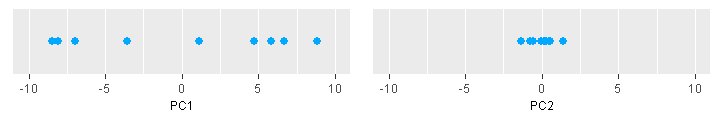

In [14]:
output_size(6,1)
p1 = ggplot(data.pc) + xlim(-10,10) + ylim(-1,1) + geom_point(aes(x=PC1), y=0) + theme.x_axis_only
p2 = ggplot(data.pc) + xlim(-10,10) + ylim(-1,1) + geom_point(aes(x=PC2), y=0) + theme.x_axis_only
grid.arrange(p1, p2, nrow=1)
output_size(restore)

#### Variation in Transformed Dataset

In [15]:
data.frame(variance_PC1=var(data.pc$PC1), variance_PC2=var(data.pc$PC2))

variance_PC1,variance_PC2
47.25015,0.6595732


#### Relative Variation in Transformed Dataset

The PC1 principal component accounts for 99% of the variation in the data, the PC2 prinicipal component accounts for 1% of the variation in the data.

Note that the separation of variance is greater in the principal components than in the variables of original representation.  Note also that the total variation remains the same.

In [16]:
variable = c("PC1", "PC2")
sdev = c(sd(data.pc$PC1), sd(data.pc$PC2))
variance = c(var(data.pc$PC1), var(data.pc$PC2))
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree.pc = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree.pc

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
PC1,6.8738744,47.2501491,47.25015,0.986233,0.986233
PC2,0.8121411,0.6595732,47.90972,0.013767,1.000000


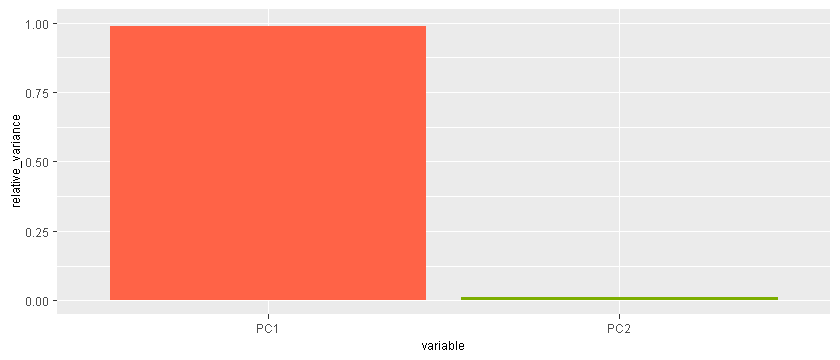

In [17]:
ggplot(scree.pc) + ylim(0,1) + geom_col(aes(x=variable, y=relative_variance, fill=variable)) +
scale_fill_manual(values=PALETTE[2:3]) + theme.no_legend

### Principal Component Transformation and 2 Variables (normalized)

Normalize data to ensure that variation in a variable distribution is not obscured by scale.  Consider the effect of calculating principal components on normalized data.

#### Data

Consider this pedagogical data.

In [18]:
data = data.frame(x=c(1, 2, 3, 6, 11, 14, 15, 16, 18), y=5*c(2.7, 2.3, 2.4, 2.8, 2.7, 3.2, 3.3, 3.25, 3.4)-5)
data

x,y
1,8.50
2,6.50
3,7.00
6,9.00
11,8.50
14,11.00
15,11.50
16,11.25
18,12.00


#### Normalized Dataset

In [19]:
data.norm = as.data.frame(scale(data))
data.norm

x,y
-1.2930680,-0.4782867
-1.1419302,-1.4621908
-0.9907924,-1.2162148
-0.5373789,-0.2323107
0.2183102,-0.4782867
0.6717236,0.7515934
0.8228614,0.9975694
0.9739993,0.8745814
1.2762749,1.2435454


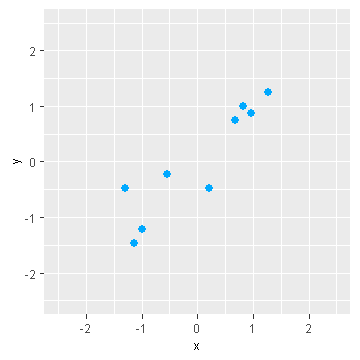

In [20]:
output_size(3,3)
ggplot(data.norm) + xlim(-2.5,2.5) + ylim(-2.5,2.5) + geom_point(aes(x=x, y=y))
output_size(restore)

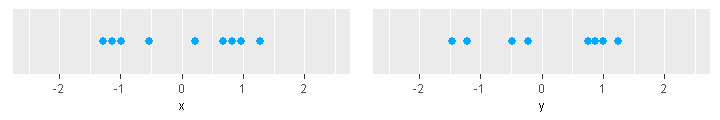

In [21]:
output_size(6,1)
p1 = ggplot(data.norm) + xlim(-2.5,2.5) + ylim(-1,1) + geom_point(aes(x=x), y=0) + theme.x_axis_only
p2 = ggplot(data.norm) + xlim(-2.5,2.5) + ylim(-1,1) + geom_point(aes(x=y), y=0) + theme.x_axis_only
grid.arrange(p1, p2, nrow=1)
output_size(restore)

#### Relative Variation in Normalized Dataset

The x variable accounts for 50% of the variation in the data, the y variable accounts for 50% of the variation in the data. 

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
x,1,1,1,0.5,0.5
y,1,1,2,0.5,1.0


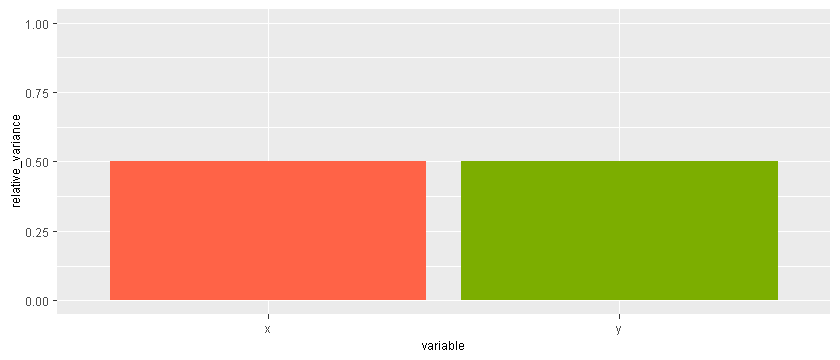

In [22]:
variable = c("x", "y")
sdev = c(sd(data.norm$x), sd(data.norm$y))
variance = c(var(data.norm$x), var(data.norm$y))
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree.norm = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree.norm

ggplot(scree.norm) + ylim(0,1) + geom_col(aes(x=variable, y=relative_variance, fill=variable)) + 
scale_fill_manual(values=PALETTE[2:3]) + theme.no_legend

#### Principal Components

In [23]:
pc.norm = prcomp(data.norm, scale=FALSE, retx=TRUE)

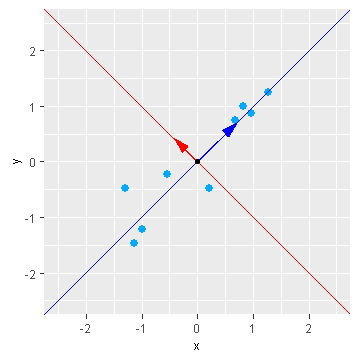

In [24]:
eigen.x.pc1 = pc.norm$rotation["x","PC1"]
eigen.y.pc1 = pc.norm$rotation["y","PC1"] 
eigen.x.pc2 = pc.norm$rotation["x","PC2"]
eigen.y.pc2 = pc.norm$rotation["y","PC2"] 
x1 = pc.norm$center["x"]
y1 = pc.norm$center["y"]
m.pc1 = eigen.y.pc1/eigen.x.pc1
m.pc2 = -1/m.pc1
i.pc1 = -m.pc1*x1 + y1
i.pc2 = -m.pc2*x1 + y1

output_size(3,3)
ggplot(data.norm) + xlim(-2.5,2.5) + ylim(-2.5,2.5) +
geom_point(aes(x=x, y=y)) +
geom_abline(aes(slope=m.pc1, intercept=i.pc1), color="blue") +
geom_abline(aes(slope=m.pc2, intercept=i.pc2), color="red") +
geom_segment(aes(x=x1, y=y1, xend=x1+eigen.x.pc1, yend=y1+eigen.y.pc1), arrow=standard_arrow, color="blue") +
geom_segment(aes(x=x1, y=y1, xend=x1+0.6*eigen.x.pc2, yend=y1+0.6*eigen.y.pc2), arrow=standard_arrow, color="red") +
geom_point(aes(x=x1, y=y1), size=1, color="black")
output_size(restore)

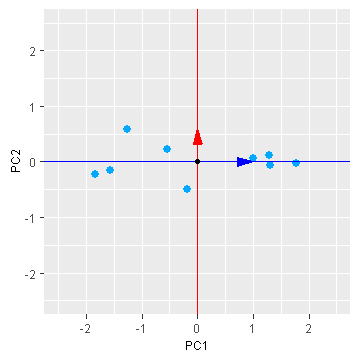

In [25]:
output_size(3,3)
ggplot(as.data.frame(pc.norm$x)) + xlim(-2.5,2.5) + ylim(-2.5,2.5) +
geom_point(aes(x=PC1, y=PC2)) +
geom_hline(aes(yintercept=0), color="blue") +
geom_vline(aes(xintercept=0), color="red") +
geom_segment(aes(x=0, y=0, xend=1, yend=0), arrow=standard_arrow, color="blue") +
geom_segment(aes(x=0, y=0, xend=0, yend=0.6*1), arrow=standard_arrow, color="red") +
geom_point(aes(x=0, y=0), size=1, color="black")
output_size(restore)

In [26]:
as.data.frame(pc.norm$center)
pc.norm$rotation
data.norm.pc = as.data.frame(pc.norm$x)
data.norm.pc

,pc.norm$center
x,4.934325e-17
y,3.885781e-16


,PC1,PC2
x,0.7071068,-0.7071068
y,0.7071068,0.7071068


PC1,PC2
-1.2525369,0.57613737
-1.8413916,-0.22645845
-1.5605897,-0.15939771
-0.5442527,0.21571581
-0.1838312,-0.49256838
1.0064371,0.05647645
1.2872390,0.12353719
1.3071439,-0.07029905
1.7817820,-0.02314323


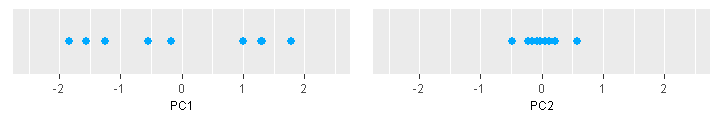

In [27]:
output_size(6,1)
p1 = ggplot(data.norm.pc) + xlim(-2.5,2.5) + geom_point(aes(x=PC1, y=0)) + theme.x_axis_only
p2 = ggplot(data.norm.pc) + xlim(-2.5,2.5) + geom_point(aes(x=PC2, y=0)) + theme.x_axis_only
grid.arrange(p1, p2, nrow=1)
output_size(restore)

#### Relative Variation in Transformed Normalized Dataset

The PC1 principal component accounts for 95% of the variation in the data, the PC2 principal component accounts for 5% of the variation in the data.

Note that the separation of variance is less in the transformed normalized data than in the transformed original data, but still greater than in the original data.

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
PC1,1.3819501,1.90978615,1.909786,0.95489307,0.9548931
PC2,0.3003562,0.09021385,2.000000,0.04510693,1.0000000


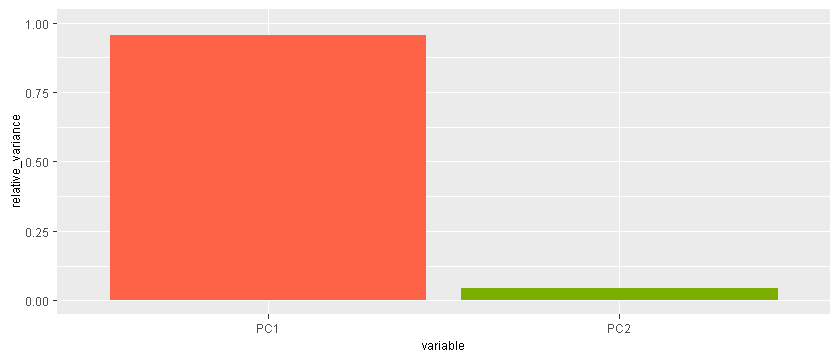

In [28]:
variable = c("PC1", "PC2")
sdev = c(sd(data.norm.pc$PC1), sd(data.norm.pc$PC2))
variance = c(var(data.norm.pc$PC1), var(data.norm.pc$PC2))
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree.norm.pc = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree.norm.pc

ggplot(scree.norm.pc) + geom_col(aes(x=variable, y=relative_variance, fill=variable)) + ylim(0,1) +
scale_fill_manual(values=PALETTE[2:3]) + theme.no_legend

### Principal Component Transformation and 3 Variables (normalized)

#### Data

Consider this pedagogical data.

In [29]:
data.ext = data.frame(x=c(1, 2, 3, 6, 11, 14, 15, 16, 18),
                      y=5*c(2.7, 2.3, 2.4, 2.8, 2.7, 3.2, 3.3, 3.25, 3.4)-5,
                      z=c(1, 2, 10, 13, 16, 15, 4, 8, 6))
data.ext

x,y,z
1,8.50,1
2,6.50,2
3,7.00,10
6,9.00,13
11,8.50,16
14,11.00,15
15,11.50,4
16,11.25,8
18,12.00,6


#### Normalized Dataset

In [30]:
data.ext.norm = as.data.frame(scale(data.ext))
data.ext.norm

x,y,z
-1.2930680,-0.4782867,-1.32244880
-1.1419302,-1.4621908,-1.14211487
-0.9907924,-1.2162148,0.30055654
-0.5373789,-0.2323107,0.84155833
0.2183102,-0.4782867,1.38256011
0.6717236,0.7515934,1.20222618
0.8228614,0.9975694,-0.78144702
0.9739993,0.8745814,-0.06011131
1.2762749,1.2435454,-0.42077916


In [31]:
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.ext.norm[,c("x","y","z")], type="s", col=PALETTE[1], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
grid3d(c("x","y","z"))
rglwidget(elementId="data", width=400, height=400, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

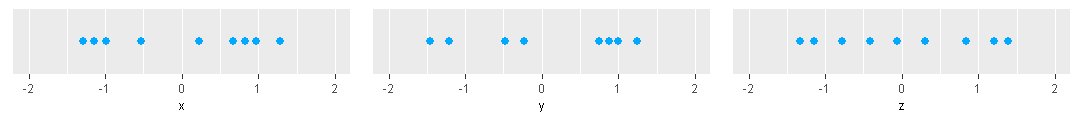

In [32]:
output_size(9,1)
p1 = ggplot(data.ext.norm) + xlim(-2,2) + ylim(-1,1) + geom_point(aes(x=x), y=0) + theme.x_axis_only
p2 = ggplot(data.ext.norm) + xlim(-2,2) + ylim(-1,1) + geom_point(aes(x=y), y=0) + theme.x_axis_only
p3 = ggplot(data.ext.norm) + xlim(-2,2) + ylim(-1,1) + geom_point(aes(x=z), y=0) + theme.x_axis_only
grid.arrange(p1, p2, p3, nrow=1)
output_size(restore)

#### Relative Variation in Normalized Dataset

The x variable accounts for 33% of the variation in the data, the y variable accounts for 33% of the variation in the data, the z variable accounts for 33% of the variation in the data. 

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
x,1,1,1,0.3333333,0.3333333
y,1,1,2,0.3333333,0.6666667
z,1,1,3,0.3333333,1.0000000


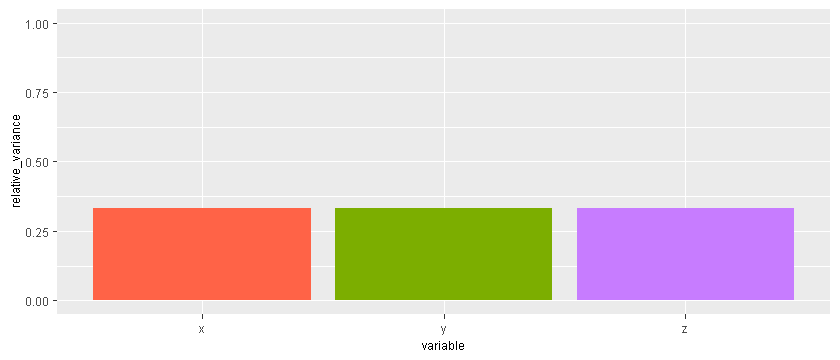

In [33]:
variable = c("x", "y", "z")
sdev = c(sd(data.ext.norm$x), sd(data.ext.norm$y), sd(data.ext.norm$z))
variance = c(var(data.ext.norm$x), var(data.ext.norm$y), var(data.ext.norm$z))
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree

ggplot(scree) + ylim(0,1) + geom_col(aes(x=variable, y=relative_variance, fill=variable)) +
scale_fill_manual(values=PALETTE[2:4]) + theme.no_legend

#### Principal Components

In [34]:
pc.ext.norm = prcomp(data.ext.norm, scale=FALSE, retx=TRUE)

In [35]:
eigen.x.pc1 = pc.ext.norm$rotation["x","PC1"]
eigen.y.pc1 = pc.ext.norm$rotation["y","PC1"] 
eigen.z.pc1 = pc.ext.norm$rotation["z","PC1"] 
eigen.x.pc2 = pc.ext.norm$rotation["x","PC2"]
eigen.y.pc2 = pc.ext.norm$rotation["y","PC2"]
eigen.z.pc2 = pc.ext.norm$rotation["z","PC2"]
eigen.x.pc3 = pc.ext.norm$rotation["x","PC3"]
eigen.y.pc3 = pc.ext.norm$rotation["y","PC3"]
eigen.z.pc3 = pc.ext.norm$rotation["z","PC3"]

x1 = pc.ext.norm$center["x"]
y1 = pc.ext.norm$center["y"]
z1 = pc.ext.norm$center["z"]

center = data.frame(x=x1, y=y1, z=z1)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.ext.norm, type="s", col=PALETTE[1], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
spheres3d(center, type="s", radius=0.2, add=TRUE)
abclines3d(x1, y1, z1, eigen.x.pc1, eigen.y.pc1, eigen.z.pc1, color="blue", add=TRUE)
abclines3d(x1, y1, z1, eigen.x.pc2, eigen.y.pc2, eigen.z.pc2, color="red", add=TRUE)
abclines3d(x1, y1, z1, eigen.x.pc3, eigen.y.pc3, eigen.z.pc3, color="violet", add=TRUE)
arrow3d(p0=c(x1,y1,z1), p1=c(x1+2*eigen.x.pc1,y1+2*eigen.y.pc1,z1+2*eigen.z.pc1), type="rotation", color="blue", add=TRUE)
arrow3d(p0=c(x1,y1,z1), p1=c(x1+1*eigen.x.pc2,y1+1*eigen.y.pc2,z1+1*eigen.z.pc2), type="rotation", color="red", add=TRUE)
arrow3d(p0=c(x1,y1,z1), p1=c(x1+0.5*eigen.x.pc3,y1+0.5*eigen.y.pc3,z1+0.5*eigen.z.pc3), type="rotation", color="violet", add=TRUE)
grid3d(c("x","y","z"))
rglwidget(elementId="pca", width=400, height=400, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

In [36]:
as.data.frame(pc.ext.norm$center)
pc.ext.norm$rotation
data.ext.norm.pc = as.data.frame(pc.ext.norm$x)
data.ext.norm.pc

,pc.ext.norm$center
x,4.934325e-17
y,3.885781e-16
z,-9.483155e-17


,PC1,PC2,PC3
x,0.6975816,-0.06982751,0.7130947
y,0.6729627,-0.27780484,-0.6855258
z,0.2459697,0.95809634,-0.1468002


PC1,PC2,PC3
-1.5491719,-1.0438713,-0.40006621
-2.0615150,-0.6083143,0.35572796
-1.4356979,0.6950170,0.08309610
-0.3242042,0.9083548,-0.34748803
0.1704880,1.4422521,0.28059356
1.2700876,0.8961474,-0.21272123
1.0531277,-1.0832895,0.01763513
1.2532191,-0.3685673,0.10382991
1.6236667,-0.8377290,0.11939281


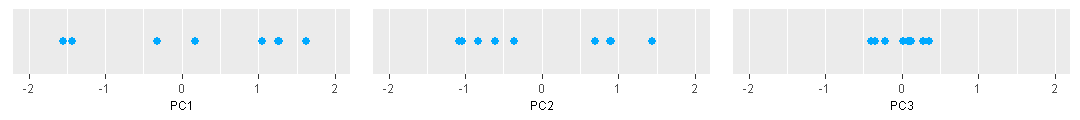

In [37]:
output_size(9,1)
p1 = ggplot(data.ext.norm.pc) + xlim(-2,2) + ylim(-1,1) + geom_point(aes(x=PC1), y=0, na.rm=TRUE) + theme.x_axis_only
p2 = ggplot(data.ext.norm.pc) + xlim(-2,2) + ylim(-1,1) + geom_point(aes(x=PC2), y=0, na.rm=TRUE) + theme.x_axis_only
p3 = ggplot(data.ext.norm.pc) + xlim(-2,2) + ylim(-1,1) + geom_point(aes(x=PC3), y=0, na.rm=TRUE) + theme.x_axis_only
grid.arrange(p1, p2, p3, nrow=1)
output_size(restore)

#### Relative Variation in Transformed Normalized Dataset

The PC1 principal component accounts for 66% of the variation in the data, the PC2 principal component accounts for 32% of the variation in the data, the PC3 principal component accounts for 2% of the variation in the data.

Note that the separation of variance is greater than in the original dataset.

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
PC1,1.4042005,1.9717791,1.971779,0.6572597,0.6572597
PC2,0.9786591,0.9577737,2.929553,0.3192579,0.9765176
PC3,0.2654189,0.0704472,3.000000,0.0234824,1.0000000


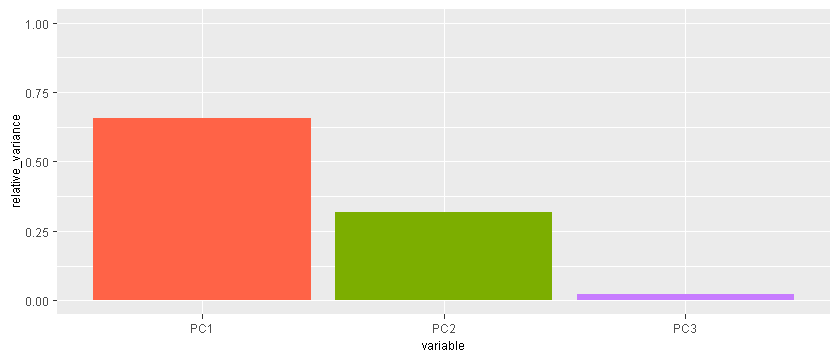

In [38]:
variable = c("PC1", "PC2", "PC3")
sdev = c(sd(data.ext.norm.pc$PC1), sd(data.ext.norm.pc$PC2), sd(data.ext.norm.pc$PC3))
variance = c(var(data.ext.norm.pc$PC1), var(data.ext.norm.pc$PC2), var(data.ext.norm.pc$PC3))
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree.ext.norm.pc = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree.ext.norm.pc

ggplot(scree.ext.norm.pc) + ylim(0,1) + geom_col(aes(x=variable, y=relative_variance, fill=variable)) +
scale_fill_manual(values=PALETTE[2:4]) + theme.no_legend

### Principal Component Analysis vs. Linear Regression

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

### Discussion

* You can extend this approach to find principal components of data represented by many variables.
* You can reduce the number of variables in your dataset by expressing it in terms of a few principal components without losing much of the information residing in the original data.

<br>

## Code

### Useful Functions

In [39]:
# help(prcomp) # from stats library
# help(scale)  # from base library

### Templates

In [40]:
data = data.frame(x=c(1, 2, 3, 6, 11), y=c(3, 2, 2, 3, 3), z=c(1, 2, 10, 13, 16))

data.norm = as.data.frame(scale(data))
pc = prcomp(data.norm, scale=FALSE, retx=TRUE)

as.data.frame(pc$center)
as.data.frame(pc$rotation)
as.data.frame(pc$x)

,pc$center
x,8.881784e-17
y,-1.554312e-16
z,-7.216450e-17


,PC1,PC2,PC3
x,0.6507143,-0.2061825,-0.7307938
y,0.4388098,0.8875572,0.1403146
z,0.6196909,-0.4119842,0.6680211


PC1,PC2,PC3
-0.9487445,1.2900763,0.01139378
-1.4956183,-0.4433414,-0.32542746
-0.5896033,-0.9895969,0.29649428
0.9743891,0.2919512,0.31074356
2.0595771,-0.1490891,-0.29320417


In [41]:
data = data.frame(x=c(1, 2, 3, 6, 11), y=c(3, 2, 2, 3, 3), z=c(1, 2, 10, 13, 16))

pc = prcomp(data.norm, scale=TRUE, retx=TRUE) # use scale=TRUE to have prcomp function normalize the dataset 

as.data.frame(pc$center)
as.data.frame(pc$rotation)
as.data.frame(pc$x)

,pc$center
x,8.881784e-17
y,-1.554312e-16
z,-7.216450e-17


,PC1,PC2,PC3
x,0.6507143,-0.2061825,-0.7307938
y,0.4388098,0.8875572,0.1403146
z,0.6196909,-0.4119842,0.6680211


PC1,PC2,PC3
-0.9487445,1.2900763,0.01139378
-1.4956183,-0.4433414,-0.32542746
-0.5896033,-0.9895969,0.29649428
0.9743891,0.2919512,0.31074356
2.0595771,-0.1490891,-0.29320417


## Expectations

Know about this:
* What is principal component transformation and what is it used for
* How to visualize relative variation as a scree plot, conceptually and using R
* How to normalize data, using R's `scale` function
* How to calculate a data centroid, conceptually and using R
* How to calculate a data weight table, using R's `prcomp` function
* How to calculate principal component scores of data expressed in 2,  3, or more variables, given data, its centroid, and its weight table, conceptually and using R

## Further Reading

* https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
* https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca
* https://www.researchgate.net/publication/281042621_The_Selection_of_Winning_Stocks_Using_Principal_Component_Analysis
* https://stats.stackexchange.com/questions/133149/why-is-variance-instead-of-standard-deviation-the-default-measure-of-informati
* http://www.indiana.edu/~g562/PBDB2013/Day%203B%20-%20PCA%20and%20morphospace.pdf
* https://ir.canterbury.ac.nz/bitstream/handle/10092/10293/thesis.pdf?sequence=1
* https://en.wikipedia.org/wiki/Dimensionality_reduction

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised August 29, 2019
</span>
</p>